![image.png](https://raw.githubusercontent.com/mylesmharrison/nlp4free/master/assets/NLP4Free%20-%20Part%202%20-%20Data%20Acquisition%20and%20Preprocessing.png)

---

### License

This work is licensed under a [Creative Commons NonCommerical License](https://creativecommons.org/licenses/by-nc/4.0/).


<img src='https://raw.githubusercontent.com/mylesmharrison/nlp4free/master/assets/Cc_by-nc_icon.png' style="width:25%"/>

You are free to:
- **Share** — copy and redistribute the material in any medium or format
- **Adapt** — remix, transform, and build upon the material. The licensor cannot revoke these freedoms as long as you follow the license terms.


Under the following terms:
- **Attribution** — You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.
- **NonCommercial** — You may not use the material for commercial purposes.

---

# Part 2 - Data Acquisition and Preprocessing

## Data Acqusition

### Requesting Data From a Web Service with the `requests` library

<a target="_blank" href="https://colab.research.google.com/github//mylesmharrison/nlp4free/blob/master/notebooks/NLP4Free_Part2_DataAcquisitionandPreprocessing.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" align="left"/></a>

In this notebook, we will acquire and preprocess text data from online sources. We have already been introduced to the [requests library](https://requests.readthedocs.io/en/latest/) and we will show how using it, with a few simple lines of code, we can pull data from a web service (REST API).

[The Cocktail DB](https://www.thecocktaildb.com/) is an open source database of cocktails and drinks from around the world, and their ingredients. It also has an API that is free to use for educational purposes. 

Let's get some text data using the `requests` library, here a description of gin. The URL pattern for a given web service is up to its designer, and should be well documented. The Cocktail DB tells us to use the URL pattern `https://www.thecocktaildb.com/api/json/v1/1/search.php?i=<ingredient name>` in order to get information back on a drink ingredient.

First, we import the requests library, than simply make a request using the `get` method and the URL:

In [1]:
# Import the requests library
import requests

# Make a call to the API
r = requests.get("https://www.thecocktaildb.com/api/json/v1/1/search.php?i=gin")

Our machine has now made the request and hopefully gotten a response from the server! Let's check the response code.

In [2]:
# Check the response
r

<Response [200]>

We can see we have received a response code of 200, which means "OK" and that data was returned successfully. Let's check what was returned from our request. There are two ways to do this: the most straightforward is just to return using the `.text` attribute, which shows the contents of the response as an ordinary python string:

In [3]:
# What are the contents
r.text

'{"ingredients":[{"idIngredient":"2","strIngredient":"Gin","strDescription":"Gin is a distilled alcoholic drink that derives its predominant flavour from juniper berries (Juniperus communis). Gin is one of the broadest categories of spirits, all of various origins, styles, and flavour profiles, that revolve around juniper as a common ingredient.\\r\\n\\r\\nFrom its earliest origins in the Middle Ages, the drink has evolved from a herbal medicine to an object of commerce in the spirits industry. Gin emerged in England after the introduction of the jenever, a Dutch liquor which originally had been a medicine. Although this development had been taking place since early 17th century, gin became widespread after the William of Orange-led 1688 Glorious Revolution and subsequent import restrictions on French brandy.\\r\\n\\r\\nGin today is produced in subtly different ways, from a wide range of herbal ingredients, giving rise to a number of distinct styles and brands. After juniper, gin tends

We can see there is some nesting of data here, as the response is actually returned in [Javascript Object Notation (JSON) format ](https://en.wikipedia.org/wiki/JSON), or what someone who works in python might instead call a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries). We can see the resposne in JSON format as well using `.json` method of the response object:

In [4]:
# Convert to JSON and dict
r.json()

{'ingredients': [{'idIngredient': '2',
   'strIngredient': 'Gin',
   'strDescription': 'Gin is a distilled alcoholic drink that derives its predominant flavour from juniper berries (Juniperus communis). Gin is one of the broadest categories of spirits, all of various origins, styles, and flavour profiles, that revolve around juniper as a common ingredient.\r\n\r\nFrom its earliest origins in the Middle Ages, the drink has evolved from a herbal medicine to an object of commerce in the spirits industry. Gin emerged in England after the introduction of the jenever, a Dutch liquor which originally had been a medicine. Although this development had been taking place since early 17th century, gin became widespread after the William of Orange-led 1688 Glorious Revolution and subsequent import restrictions on French brandy.\r\n\r\nGin today is produced in subtly different ways, from a wide range of herbal ingredients, giving rise to a number of distinct styles and brands. After juniper, gin te

Now to pull out the description, it is a matter of subsetting the returned list associated with the `ingredients` key (there is only one element, element 0) and the getting the value associated with the `strDescription` key within it:

In [5]:
description = r.json()['ingredients'][0]['strDescription']
print(description)

Gin is a distilled alcoholic drink that derives its predominant flavour from juniper berries (Juniperus communis). Gin is one of the broadest categories of spirits, all of various origins, styles, and flavour profiles, that revolve around juniper as a common ingredient.

From its earliest origins in the Middle Ages, the drink has evolved from a herbal medicine to an object of commerce in the spirits industry. Gin emerged in England after the introduction of the jenever, a Dutch liquor which originally had been a medicine. Although this development had been taking place since early 17th century, gin became widespread after the William of Orange-led 1688 Glorious Revolution and subsequent import restrictions on French brandy.

Gin today is produced in subtly different ways, from a wide range of herbal ingredients, giving rise to a number of distinct styles and brands. After juniper, gin tends to be flavoured with botanical/herbal, spice, floral or fruit-flavours or often a combination. I

Great! We have sucessfully retrieved some text from an API using `requests`. We could write more code to return more data programatically and stored in a data structure such as a list or pandas dataframe to work with in an NLP task:

In [6]:
# List of ingredients for building request URLs
ingredients = ['gin', 'vodka', 'rum']

# Empty list to hold descriptions returned from API
description_list = list()

# Iterate over the ingredients
for ingredient in ingredients:
    
    # Make a call to the API
    r = requests.get(f"https://www.thecocktaildb.com/api/json/v1/1/search.php?i={ingredient}")
    
    # Pull out the description and append to the list
    description = r.json()['ingredients'][0]['strDescription']
    description_list.append({'ingredient':ingredient, 'description':description})

Now we have a list storing the description field from data returned from the API calls:

In [7]:
description_list

[{'ingredient': 'gin',
  'description': 'Gin is a distilled alcoholic drink that derives its predominant flavour from juniper berries (Juniperus communis). Gin is one of the broadest categories of spirits, all of various origins, styles, and flavour profiles, that revolve around juniper as a common ingredient.\r\n\r\nFrom its earliest origins in the Middle Ages, the drink has evolved from a herbal medicine to an object of commerce in the spirits industry. Gin emerged in England after the introduction of the jenever, a Dutch liquor which originally had been a medicine. Although this development had been taking place since early 17th century, gin became widespread after the William of Orange-led 1688 Glorious Revolution and subsequent import restrictions on French brandy.\r\n\r\nGin today is produced in subtly different ways, from a wide range of herbal ingredients, giving rise to a number of distinct styles and brands. After juniper, gin tends to be flavoured with botanical/herbal, spic

Finally, we can plunk this into a pandas dataframe to make things a bit nicer:

In [8]:
# Check ouput
import pandas as pd

# Create a pandas dataframe from the list of key-value pairs
# Keys are the column name, values are the values for each row
desc_df = pd.DataFrame(description_list)

# Check
desc_df.head()

,ingredient,description
0,gin,Gin is a distilled alcoholic drink that derive...
1,vodka,Vodka is a distilled beverage composed primari...
2,rum,Rum is a distilled alcoholic beverage made fro...


## Scraping Web Pages with BeautifulSoup

Unfortunately, the data we need is not always available for download or from a web service. In some cases we may have to [web scrape](https://en.wikipedia.org/wiki/Web_scraping) data if it is "locked up" in pages that are meant to be viewed in the browser.

It should be noted that web scraping is a bit of a gray area legally, but as with free and open APIs, be respectful of whomever is hosting the content and associated resources (*i.e.* do not make excessive requests, or scrape entire sites without permission).

Because the data is locked up in the code of the web page (a "beautiful soup" of HTML, Javascript, CSS, and other languages) we may also have to apply some elbow grease and do some work to pull out the elements in the page code that we want. Fortunately, [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) makes this easy, and we'll see you can almost treat the page code like a searchable database.

Here we will scrape some text from the excellent online resource [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/ ), in particular [this page](https://christophm.github.io/interpretable-ml-book/what-is-machine-learning.html). Given its simple page structure, this should be relatively straightforward to do. `requests` has already been imported above, and we will now import the `BeautifulSoup` class for use shortly (the library name in python for BeautifulSoup is `bs4`, as it is version 4):

In [9]:
from bs4 import BeautifulSoup

# Page to scrape
url = 'https://christophm.github.io/interpretable-ml-book/what-is-machine-learning.html'

Next, we make a request for the page using `requests`, just like we did for an API. The difference here is we are hitting a web server, which will return a web page, normally requested by and rendered in a browser:

In [10]:
# Make the request
r = requests.get(url)

Let's take a look at the first 2000 characters of the result as a string:

In [11]:
r.text[0:2000]

'<!DOCTYPE html>\n<html lang="" xml:lang="">\n<head>\n\n  <meta charset="utf-8" />\n  <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n  <title>2.2 What Is Machine Learning? | Interpretable Machine Learning</title>\n  <meta name="description" content="Machine learning algorithms usually operate as black boxes and it is unclear how they derived a certain decision. This book is a guide for practitioners to make machine learning decisions interpretable." />\n  <meta name="generator" content="bookdown 0.32 and GitBook 2.6.7" />\n\n  <meta property="og:title" content="2.2 What Is Machine Learning? | Interpretable Machine Learning" />\n  <meta property="og:type" content="book" />\n  \n  <meta property="og:description" content="Machine learning algorithms usually operate as black boxes and it is unclear how they derived a certain decision. This book is a guide for practitioners to make machine learning decisions interpretable." />\n  \n\n  <meta name="twitter:card" content="summary" /

Yep, that's the page code alright, but it's a bit difficult to read. Let's pass this into the BeautifulSoup class and create a BeautifulSoup object:

In [12]:
soup = BeautifulSoup(r.text)

soup

<!DOCTYPE html>
<html lang="" xml:lang="">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>2.2 What Is Machine Learning? | Interpretable Machine Learning</title>
<meta content="Machine learning algorithms usually operate as black boxes and it is unclear how they derived a certain decision. This book is a guide for practitioners to make machine learning decisions interpretable." name="description"/>
<meta content="bookdown 0.32 and GitBook 2.6.7" name="generator"/>
<meta content="2.2 What Is Machine Learning? | Interpretable Machine Learning" property="og:title"/>
<meta content="book" property="og:type"/>
<meta content="Machine learning algorithms usually operate as black boxes and it is unclear how they derived a certain decision. This book is a guide for practitioners to make machine learning decisions interpretable." property="og:description"/>
<meta content="summary" name="twitter:card"/>
<meta content="2.2 What Is Machine Learning? | Int

That seems more or less the same but now a little easier to read. What has BeautifulSoup done? Now, we can use the `.find` method to pull out individual page elements, by [tag, class, or id](https://en.wikipedia.org/wiki/HTML#Elements). Here we will just grab the first paragraph element:

In [13]:
soup.find('p')

<p>Machine learning is a set of methods that computers use to make and improve predictions or behaviors based on data.</p>

Furthermore, we can use `find_all` to return all elements of a given type in the page as an array and iterate over it, and pull out only the text of each paragraph using the `.text` attribute. Let's look at the first 3 paragraphs:

In [14]:
# Check first 3 elements
for elem in soup.find_all("p")[0:2]:
    print(elem.text)

Machine learning is a set of methods that computers use to make and improve predictions or behaviors based on data.
For example, to predict the value of a house, the computer would learn patterns from past house sales.
The book focuses on supervised machine learning, which covers all prediction problems where we have a dataset for which we already know the outcome of interest (e.g. past house prices) and want to learn to predict the outcome for new data.
Excluded from supervised learning are for example clustering tasks (= unsupervised learning) where we do not have a specific outcome of interest, but want to find clusters of data points.
Also excluded are things like reinforcement learning, where an agent learns to optimize a certain reward by acting in an environment (e.g. a computer playing Tetris).
The goal of supervised learning is to learn a predictive model that maps features of the data (e.g. house size, location, floor type, …) to an output (e.g. house price).
If the output is

Great, now let's join it all together, and replace the newline characters with spaces, to create one giant string of text:

In [35]:
text = ""

for paragraph in soup.find_all("p"):
    text += paragraph.text.replace('\n', ' ') + ' '

print(text)

Machine learning is a set of methods that computers use to make and improve predictions or behaviors based on data. For example, to predict the value of a house, the computer would learn patterns from past house sales. The book focuses on supervised machine learning, which covers all prediction problems where we have a dataset for which we already know the outcome of interest (e.g. past house prices) and want to learn to predict the outcome for new data. Excluded from supervised learning are for example clustering tasks (= unsupervised learning) where we do not have a specific outcome of interest, but want to find clusters of data points. Also excluded are things like reinforcement learning, where an agent learns to optimize a certain reward by acting in an environment (e.g. a computer playing Tetris). The goal of supervised learning is to learn a predictive model that maps features of the data (e.g. house size, location, floor type, …) to an output (e.g. house price). If the output is

We now have a scraped text data from a website! Doing so for more complicated pages or programatically over many pages can be accomplished with more code and inspecting the different pages' structure. The difficulty or ease of doing so will depend upon how the page is site is structured and page code.

## Data Preprocessing

We have now acquired some text. Before using this text in an ML application of NLP, we first need to preprocess the data.

As outlined in the slides, major steps in preprocessing text are:
- Normalization (addressing case, removing punctuation and stop words, stemming or lemmatization)
- Tokenization (breaking up into individual units of language, usually words)
- Vectorization (converting tokens to structured numeric data)

### Normalization

There are a few things we need to do here: *addressing case, removing punctuation, and stemming or lemmatization*. For simplicity's sake, we will not expand contractions (don't, won't, can't, etc.) though this would be another normalization step. We will also only try the simpler technique of stemming, though there are lemmatizers built in to packages such as [nltk](https://www.nltk.org/_modules/nltk/stem/wordnet.html) and [TextBlob](https://textblob.readthedocs.io/en/dev/quickstart.html#words-inflection-and-lemmatization).

To standardize the case, we simply convert everything to lowercase:

In [36]:
# Convert to lower case
text = text.lower()
text[0:500]

'machine learning is a set of methods that computers use to make and improve predictions or behaviors based on data. for example, to predict the value of a house, the computer would learn patterns from past house sales. the book focuses on supervised machine learning, which covers all prediction problems where we have a dataset for which we already know the outcome of interest (e.g.\xa0past house prices) and want to learn to predict the outcome for new data. excluded from supervised learning are for'

It appears there are also some unicode characters mixed in there, which is never good. Dealing with special characters and different text encodings can be one of the challenge parts of doing NLP. We will change the encoding to ASCII to address these:

In [37]:
text = text.encode('ASCII', errors='ignore').decode()
text[0:500]

'machine learning is a set of methods that computers use to make and improve predictions or behaviors based on data. for example, to predict the value of a house, the computer would learn patterns from past house sales. the book focuses on supervised machine learning, which covers all prediction problems where we have a dataset for which we already know the outcome of interest (e.g.past house prices) and want to learn to predict the outcome for new data. excluded from supervised learning are for '

That's better, we can see the special characters like `\xa0` that were present before are now gone. Next we will remove all punctuation. Fortunately, all the punctuation characters are contained in a string stored in the python `string` base module:

In [38]:
from string import punctuation

print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


We can now iterate over each punctuation character, and update the text, replacing it with the empty string `''`:

In [39]:
for punctuation_mark in punctuation:
    text = text.replace(punctuation_mark, '')

In [40]:
# Check the result
text[0:1000]

'machine learning is a set of methods that computers use to make and improve predictions or behaviors based on data for example to predict the value of a house the computer would learn patterns from past house sales the book focuses on supervised machine learning which covers all prediction problems where we have a dataset for which we already know the outcome of interest egpast house prices and want to learn to predict the outcome for new data excluded from supervised learning are for example clustering tasks  unsupervised learning where we do not have a specific outcome of interest but want to find clusters of data points also excluded are things like reinforcement learning where an agent learns to optimize a certain reward by acting in an environment ega computer playing tetris the goal of supervised learning is to learn a predictive model that maps features of the data eghouse size location floor type  to an output eghouse price if the output is categorical the task is called class

We can already see some strange things are happening, such as the *e.g.* getting folded into the words "past" and "house" to create the tokens "egpast" and "eghouse". Preprocessing text is not an exact science... we will proceed as is for now, though there perhaps could have been better ways to tokenize or deal with problematic portions of this text such as abbreviations.

### Stemming
Stemming and lemmatization are built into the very powerful [nltk toolkit](https://www.nltk.org/). Here we choose to do simple stemming using the `SnowBallStemmer` (a particular type of stemming algorithm):

In [42]:
from nltk.stem import SnowballStemmer

# Instantiate stemmer for english
sbstem = SnowballStemmer('english')

# Check
sbstem.stem('running')

'run'

Stemmers in `nltk` operation on individual tokens, so we must iterate over the freeform text, then join everything back together again:

In [43]:
# Create an empty list for the stemmed words
stemmed_words = list()

# Iterate over each word and stem and add to new string
for word in text.split(' '):
    stemmed_words.append(sbstem.stem(word))
    
# Join it all back together and remove any repeated or extraneous spaces
text = ' '.join(stemmed_words).strip()

In [44]:
# Check
text[0:500]

'machin learn is a set of method that comput use to make and improv predict or behavior base on data for exampl to predict the valu of a hous the comput would learn pattern from past hous sale the book focus on supervis machin learn which cover all predict problem where we have a dataset for which we alreadi know the outcom of interest egpast hous price and want to learn to predict the outcom for new data exclud from supervis learn are for exampl cluster task  unsupervis learn where we do not hav'

We can see that words like *machine* have been stemmed to *machin*, and *improve* to *improv*, and so on, so we appear to have applied stemming correctly. This is enough normalization for now, and we can move on to tokenizing and vectorizing our text.

### Tokenization

Our approach for tokenization could be as simple as splitting on whitespace. As we saw above, we actually did this step and then undid it, as the `nltk` stemmer works on individual words. Alternatively, we could have applied stemming *after* or as part of tokenization, as the different steps in text preprocessing are not necessarily always in a particular order depending upon implementation).

Splitting on whitespace is as simple as using the `.split()` method in base python built in to any string variable:

In [45]:
# Tokenize and show first 10 tokens
text.split(' ')[0:10]

['machin', 'learn', 'is', 'a', 'set', 'of', 'method', 'that', 'comput', 'use']

More sophisticated approaches for tokenization exist. We actually do not need do this step manually, as it is included in the vectorization step in code as part of `scikit-learn` as we will see below.

### Vectorization

There are two standard types of vectorization used in traditional NLP: *count vectorization* and *term frequency - inverse document frequency (tf-idf)* vectorization. Binary ("One-hot") encoding with a boolean (0/1) flag for word occurrence in each document can also be done, though this is less common.

The two former vectorization methods are implemented in `scikit-learn` in the `feature_extraction.text` submodule and we can apply as below:

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Instatiate, fit and transform - Count vectorization
cv = CountVectorizer()
count_vectorized = cv.fit_transform([text])

# Instatiate, fit and transform - TF-IDF vectorization
tfidf = TfidfVectorizer()
tfidf_vectorized = tfidf.fit_transform([text])

Let's take a look at the outputs:

In [47]:
count_vectorized

<1x263 sparse matrix of type '<class 'numpy.int64'>'
	with 263 stored elements in Compressed Sparse Row format>

This is a sparse matrix - the *document-term matrix* - with each feature (column) being a token that appeared in the documents (rows), so there are 263 unique tokens in our single document of text. This can be cast into a dense array and we can pass the tokens as the column names using pandas:

In [48]:
import pandas as pd
count_df = pd.DataFrame(count_vectorized.todense(), columns=cv.get_feature_names_out())

count_df.head()

,about,act,actual,addit,advantag,agent,algorithm,all,alreadi,also,...,which,will,win,with,work,wors,would,you,young,your
0,2,1,1,1,1,1,3,2,1,2,...,3,2,1,2,2,1,3,10,1,1


Great, we now have a count of the number of occurrences of each token in our text!

Contrast this with the floating point numbers from tf-idf vectorization:

In [49]:
tfidf_df = pd.DataFrame(tfidf_vectorized.todense(), columns=tfidf.get_feature_names_out())

tfidf_df.head()

,about,act,actual,addit,advantag,agent,algorithm,all,alreadi,also,...,which,will,win,with,work,wors,would,you,young,your
0,0.02557,0.012785,0.012785,0.012785,0.012785,0.012785,0.038355,0.02557,0.012785,0.02557,...,0.038355,0.02557,0.012785,0.02557,0.02557,0.012785,0.038355,0.127848,0.012785,0.012785


From our count vectorization, we now have a count of each token. Normally our document-term matrix would have many rows, one for each document in our corpus. Nonetheless, we can find the most frequently occurring tokens in the text we scraped by doing a simple sort and making a bar chart:

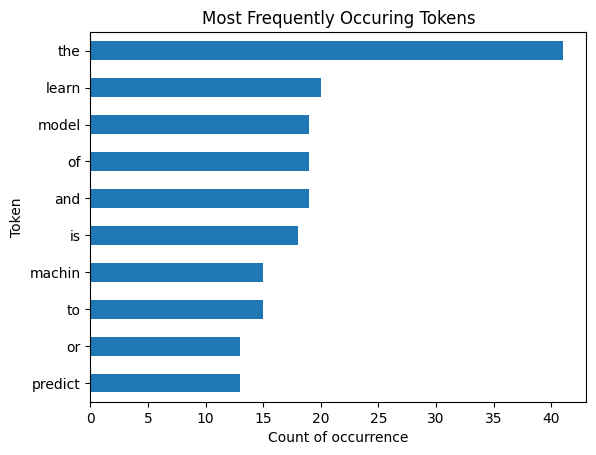

In [50]:
import matplotlib.pyplot as plt
count_df.T[0].sort_values().tail(10).plot(kind='barh')
plt.xlabel('Count of occurrence')
plt.ylabel('Token')
plt.title('Most Frequently Occuring Tokens')
plt.show()

We can see that many of the most frequently occuring tokens are [stop words](https://en.wikipedia.org/wiki/Stop_word). We could have dealt with these as part of preprocessing, however, fortunately for us basic stopword removal is built into the vectorizers in scikit-learn and so this can be done concurrently. 

So we will take a step back here and re-vectorize our data, while removing stopwords, then replot the result:

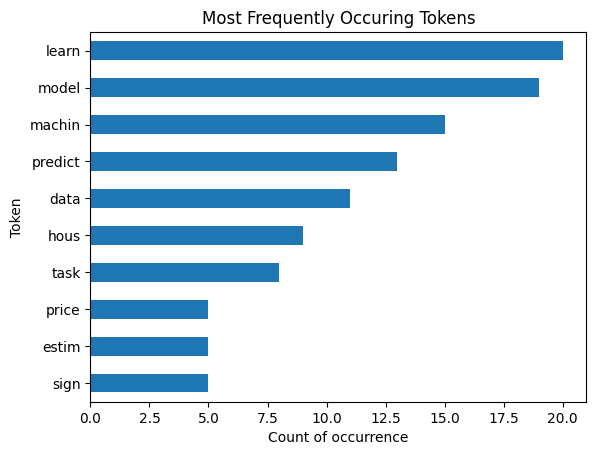

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Instatiate, fit and transform - Count vectorization
cv = CountVectorizer(stop_words='english')
count_vectorized = cv.fit_transform([text])

# Recreate the dataframe
count_df = pd.DataFrame(count_vectorized.todense(), columns=cv.get_feature_names_out())

# Visualize again
count_df.T[0].sort_values().tail(10).plot(kind='barh')
plt.xlabel('Count of occurrence')
plt.ylabel('Token')
plt.title('Most Frequently Occuring Tokens')
plt.show()

This seems to be more representative, given what we know about the topic of the original text. Without doing any machine learning, we have done some basic text analytics (content analysis) given we now have structured data!

Here we have performed the basics of the preprocessing steps for text on a single document. In practice, this would be done over a very large corpus of many documents, and the document-term matrix produced from vectorization can grown quite large. 


<img src="https://raw.githubusercontent.com/mylesmharrison/nlp4free/master/assets/Cc_by-nc_icon.png" style="max-height: 15px; float:left">
<a href="https://www.mylesharrison.com/nlp4free" style="float: right; align: right; text-decoration:none; color:black">NLP4Free 🔠⚡🤖🧠😃</a>